In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('Breast_cancer_data.csv')
print(df.shape)
df.head()

(569, 6)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [8]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


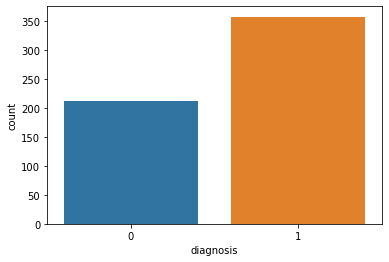

In [6]:
sns.countplot('diagnosis',data=df)
#0=Benign,1=Malignant

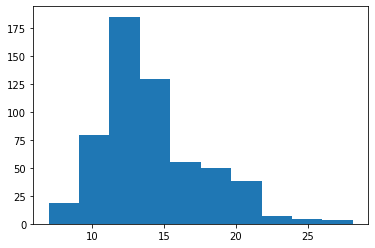

In [13]:
df['mean_radius'].hist(grid=False)

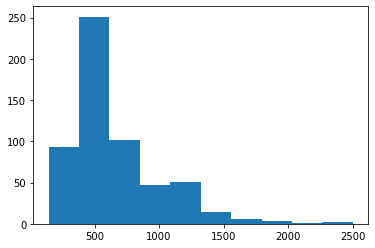

In [14]:
df['mean_area'].hist(grid=False)

In [15]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [16]:
#assigning a values to x and y
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [19]:
#splitting a dataset into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
model.score(x_test,y_test)

0.9370629370629371

In [24]:
prediction=model.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,prediction)

array([[49,  5],
       [ 4, 85]])

In [27]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.92      0.91      0.92        54\n           1       0.94      0.96      0.95        89\n\n    accuracy                           0.94       143\n   macro avg       0.93      0.93      0.93       143\nweighted avg       0.94      0.94      0.94       143\n'

# svm

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [30]:
classifier.score(x_test,y_test)

0.9020979020979021

In [31]:
pred=classifier.predict(x_test)

In [32]:
confusion_matrix(y_test,pred)

array([[40, 14],
       [ 0, 89]])

In [33]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.74      0.85        54\n           1       0.86      1.00      0.93        89\n\n    accuracy                           0.90       143\n   macro avg       0.93      0.87      0.89       143\nweighted avg       0.92      0.90      0.90       143\n'

In [ ]:
# de

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
dt_model=tree.DecisionTreeClassifier(max_depth=3)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
dt_model.score(x_test,y_test)

0.8951048951048951